In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the different data sets (1000 samples)
data_benign = pd.read_csv('data/benignDefBefore.dat',
            header=None, sep=',')
print("First data set loaded")
data_mal = pd.read_csv('data/benignDefMelBefore.dat',
            header=None, sep=',', engine='python')
print("Second data set loaded")
data_mal_modified = pd.read_csv('data/benignDefMelAfter.dat',
            header=None, sep=',', engine='python')
print("Third data set loaded")


First data set loaded
Second data set loaded
Third data set loaded


In [2]:
from scipy import spatial
import math
cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_benign[i], data_mal[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between benign and malicious " + str(np.mean(cosine_similarities)))

cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_benign[i], data_mal_modified[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
print("Similarity between benign and modified malicious " + str(np.mean(cosine_similarities)))

cosine_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_modified[i], data_mal[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)


print("Similarity between malicious and modififed malicious " + str(np.mean(cosine_similarities)))

/Users/lennartoverdevest/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Similarity between benign and malicious 0.10304919268909528
Similarity between benign and modified malicious 0.1246994524127084
Similarity between malicious and modififed malicious 0.7495427955126407


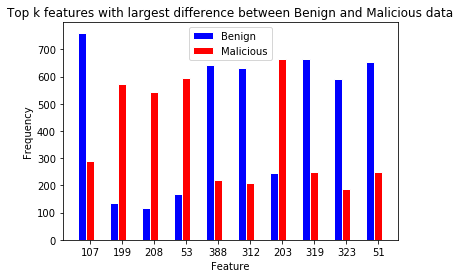

In [3]:
import familiarization as fm
# Compute the summation of each column/feature
sum_column_benign = data_benign.sum(axis = 0, skipna = True)
sum_column_mal = data_mal.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 10

# Create dataframe for plotting
plot_df = pd.DataFrame()
plot_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_df[cur_feature_name] = data_benign[cur_feature_name] 
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df, plot_df_mal, columns, "Benign", "Malicious")

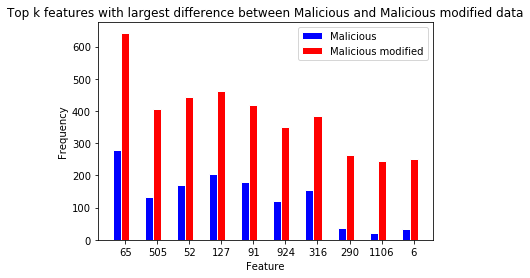

In [4]:
# Sum values of each column
sum_column_mal = data_mal.sum(axis = 0, skipna = True)
sum_column_mod = data_mal_modified.sum(axis = 0, skipna = True)

# Difference between  malicious and modified malicious
diff_mod_mal = abs(sum_column_mod - sum_column_mal)
diff_mod_mal = diff_mod_mal.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal = pd.DataFrame()
plot_df_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal.index[i]
    columns.append(cur_feature_name)
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 
    plot_df_mod[cur_feature_name] = data_mal_modified[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious modified")